<h2 style="color:green;text-align:center">Digit Handwriting Recognition </h3>

<h3 style="color:green;text-align:center"> Allie Zombron, Seth Hollatz, and Georgia Barefoot </h3>

<h3><b>Import Packages</b></h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models


<h3><b>Load the MNIST Dataset</b></h3>

In [3]:
# Load MNIST from OpenML
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto', cache=True)
y = y.astype(int)

<h3><b>Preprocessing</b></h3>


In [4]:
# Normalize values to [0, 1]
X = X / 255.0

In [5]:
# Shape
X.shape

(70000, 784)

<h3><b>Split into Training and Testing Sets</b></h3>

In [6]:
# split train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

<h3><b>Visualizing the First 10 Samples</b></h3>

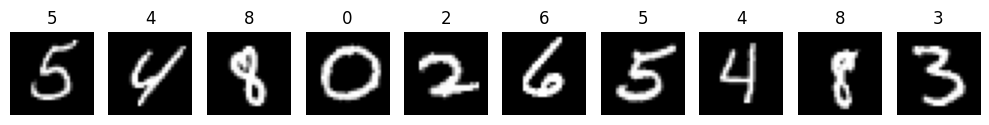

In [7]:
# visualize first 10 sample digits
plt.figure(figsize=(10,2))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(X_train[i].reshape(28,28), cmap='gray')
    ax.set_title(y_train[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

<h3><b>Build a Convolutional Neural Network (CNN)</b></h3>

In [8]:
# Reshape data for CNN input
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Define CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

<h3><b>Train the CNN</b></h3>

In [9]:
history = cnn_model.fit(
    X_train_reshaped, y_train_cat,
    epochs=5, batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.8801 - loss: 0.4002 - val_accuracy: 0.9779 - val_loss: 0.0710
Epoch 2/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 74s 49ms/step - accuracy: 0.9844 - loss: 0.0519 - val_accuracy: 0.9879 - val_loss: 0.0414
Epoch 3/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9884 - val_loss: 0.0342
Epoch 4/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9907 - val_loss: 0.0313
Epoch 5/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9905 - val_loss: 0.0356


<h3><b>Plot Training Accuracy and Loss</b></h3>

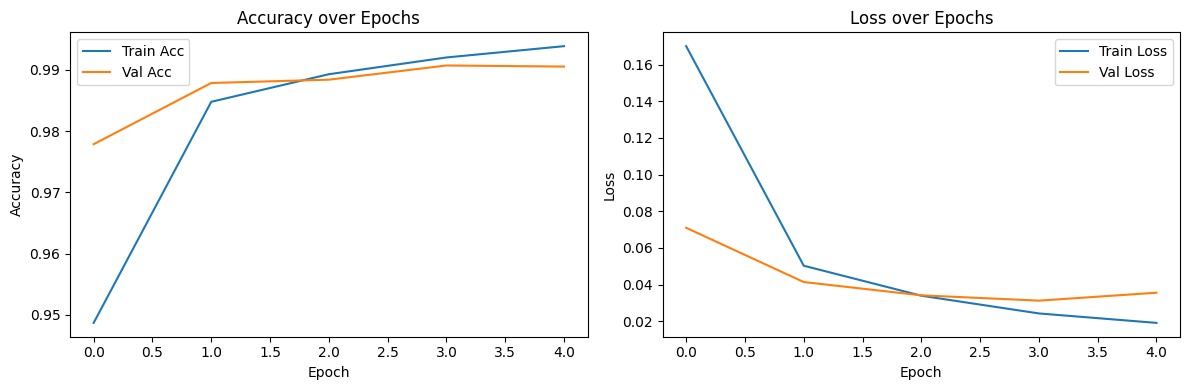

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


<h3><b>Evaluate on Test Set</b></h3>

In [11]:
# Make predictions
y_pred_prob = cnn_model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
print("Test set accuracy:", accuracy_score(y_test, y_pred))

438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step
Test set accuracy: 0.9882142857142857


<h3><b>Classification Report</b></h3>

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1343
           1       1.00      1.00      1.00      1600
           2       0.98      0.99      0.99      1380
           3       0.99      0.99      0.99      1433
           4       0.99      0.99      0.99      1295
           5       0.98      1.00      0.99      1273
           6       0.98      0.99      0.98      1396
           7       1.00      0.98      0.99      1503
           8       0.99      0.98      0.99      1357
           9       0.98      0.99      0.99      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



<h3><b>Confusion Matrix</b></h3>

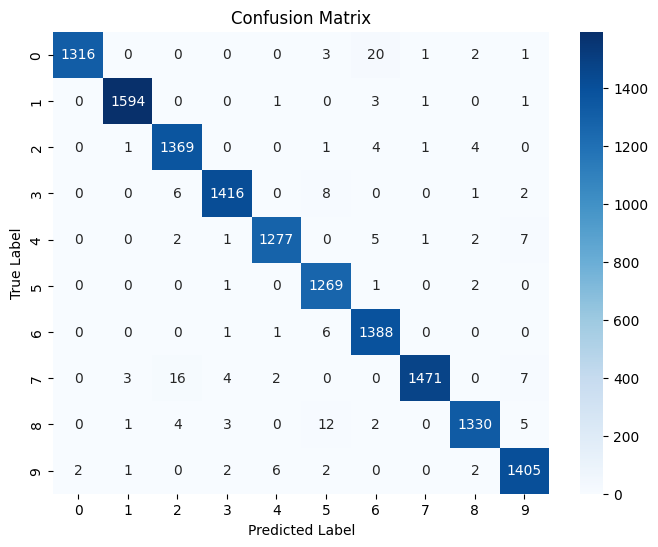

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<h3><b>Visualize Misclassified Digits</h3></b>

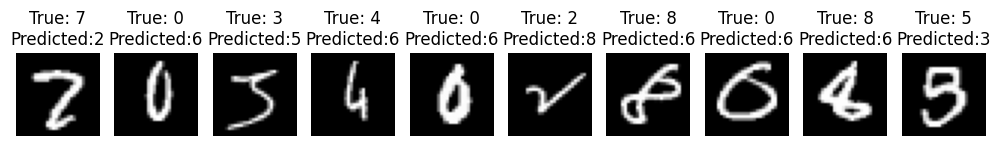

In [14]:
misclassified_idx = np.where(y_test != y_pred)[0]
plt.figure(figsize=(10,2))
for i, idx in enumerate(misclassified_idx[:10]):
    ax = plt.subplot(1,10,i+1)
    ax.imshow(X_test[idx].reshape(28,28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}\nPredicted:{y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- **Data Loading** from OpenML  
- **Normalization** to [0,1] for pixel values  
- **Train/Test Split** using 80/20 ratio  
- **Visualization** of sample handwritten digits  
- **Reshaping** of image data for CNN input (28x28x1)  
- **Label Encoding** with one-hot vectors for 10 classes  
- **CNN Model Construction** using Keras  
  - Two convolutional layers with max pooling  
  - Dense hidden layer and softmax output layer  
- **Model Training** with training and validation accuracy/loss tracked over 5 epochs  
- **Accuracy and Loss Curves** plotted for performance visualization  
- **Test Set Evaluation** including accuracy and classification report  
- **Confusion Matrix** visualization to analyze prediction errors  
- **Misclassified Digits** displayed to understand failure cases  